In [1]:
# notebook to get data for self-training RM on slightly OOD cases

In [126]:
from rlhfutils.rl_utils import get_synth_rewards, scobow
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from itertools import combinations
import numpy as np
from tqdm import tqdm
import random
from datasets import Dataset
from transformers import AutoTokenizer
from datasets import concatenate_datasets

In [6]:
from rlhfutils.rl_utils import bow_words
assert len(bow_words)==30

In [16]:
# base file used for second portion of dataset
FNAME = "/u/prasanns/research/rlhf-length-biases/outputs/rollouts/dpoplusbow50rm.jsonl"

bowtrain = pd.read_json(FNAME, orient='records', lines=True)
unlist = []
means = []
bscos = []
for i, row in tqdm(bowtrain.iterrows(), total=len(bowtrain)):
    uns = {}
    bowscos = [float(scobow(s, True, uns)) for s in row['outputs']]
    bscos.append(bowscos)
    means.append(mean(bowscos))
    unlist.append(uns)
bowtrain['golds'] = bscos

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6526/6526 [00:37<00:00, 173.04it/s]


In [11]:
odset = Dataset.load_from_disk("../../data/bowsynth50knozeros/")

In [38]:
odset

Dataset({
    features: ['question', 'source', 'modj', 'modk', 'tokj', 'tok', 'response_j', 'response_k', 'magnitude', '__index_level_0__', 'score_j', 'score_k'],
    num_rows: 49884
})

In [18]:
bowtrain

,inputs,outputs,rewards,keepinds,step,golds
0,[Write a persuasive business letter in formal ...,[\nWrite an inquiry about the time you would l...,"[-14.5078125, 1.71484375, -14.390625, -11.4296...","[1, 3, 5, 6, 8, 11, 12, 14, 16, 19, 21, 23, 24...",0,"[0.0, 2.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 1.0, ..."
1,[How can I use geospatial data to analyze patt...,[\nFed-up with the compensation for long-term ...,"[-14.5390625, -1.08203125, -14.4765625, 9.0156...","[1, 3, 5, 7, 8, 10, 12, 14, 17, 18, 20, 22, 25...",0,"[0.0, 2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,"[In your opinion, how might globalization and ...",[\nThis Olympic report showed that globalizati...,"[-14.5703125, -7.7109375, -6.3046875, -6.53906...","[1, 2, 4, 7, 9, 10, 13, 14, 16, 18, 21, 22, 24...",1,"[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, ..."
3,[Study the causes and effects of income inequa...,[\n\nYou may access this path by submitting th...,"[-14.6953125, -14.5703125, -14.6171875, -0.344...","[1, 3, 4, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25...",1,"[0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, ..."
4,"[Using photography, capture the dynamic colors...","[\nFurthermore, this instruction will show you...","[2.921875, -14.140625, 8.421875, 1.35546875, -...","[0, 2, 4, 6, 9, 11, 12, 14, 17, 18, 21, 23, 24...",2,"[2.0, 0.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, ..."
...,...,...,...,...,...,...
6521,[Write a story about a group of friends who di...,[\nI want to know the best way to experience y...,"[14.8359375, 14.8203125, 14.6796875, 14.757812...","[0, 3, 5, 7, 9, 11, 12, 15, 16, 18, 20, 23, 25...",3260,"[11.0, 12.0, 9.0, 13.0, 13.0, 13.0, 12.0, 13.0..."
6522,[What are some best practices for optimizing a...,[\nI'd like to experience the best possible ex...,"[14.8203125, 14.5078125, 14.8828125, 14.820312...","[0, 2, 4, 6, 9, 11, 12, 15, 17, 18, 21, 23, 24...",3261,"[13.0, 13.0, 13.0, 12.0, 11.0, 13.0, 13.0, 13...."
6523,[Analyze the effectiveness of different therap...,[\nLennon advice to can help you understand yo...,"[14.796875, 14.8359375, 14.84375, 14.8515625, ...","[1, 3, 4, 6, 9, 11, 13, 14, 17, 19, 20, 23, 24...",3261,"[11.0, 12.0, 13.0, 13.0, 13.0, 12.0, 13.0, 12...."
6524,[Write a science fiction story in third person...,[\nMy experience is one of the best possible e...,"[14.8203125, 14.828125, 14.84375, 14.84375, 14...","[1, 2, 5, 6, 8, 10, 13, 14, 16, 19, 21, 22, 25...",3262,"[13.0, 11.0, 13.0, 13.0, 12.0, 12.0, 12.0, 13...."


In [130]:
# given a dataset with lists of 16(?) pairs in each row, make a pairwise dataset that we can add to the experieence
def pairdset(outdf):
    pairdset = []
    lodiffs = [0]*10
    for i, row in tqdm(outdf.iterrows()):
        assert row['inputs'][0]==row['inputs'][1]
        for j in range(0, len(row['inputs']), 2):
            tmp = {}
            tmp['question'] = row['inputs'][j]
            pref = 1 if row['rewards'][j]<row['rewards'][j+1] else 0
            tmp['response_j'] = row['outputs'][j+pref].strip()
            tmp['response_k'] = row['outputs'][j+(1-pref)].strip()
            tmp['score_j'] = row['golds'][j+pref]
            tmp['score_k'] = row['golds'][j+(1-pref)]
            # difference in gold
            tmp['magnitude'] = tmp['score_j'] - tmp['score_k']
            tmp['odiff'] = row['rewards'][j+pref] - row['rewards'][j+(1-pref)]
            lodiffs.append(abs(tmp['odiff']))
            if tmp['odiff']>mean(lodiffs[-10:])*0.95:
                pairdset.append(tmp)
        if len(lodiffs)>100:
            lodiffs = lodiffs[-10:]
    return Dataset.from_list(pairdset)

def getfrac(dset, exs=1000, log=True): 
    inds = list(range(len(dset)))
    sampinds = random.sample(inds, exs)
    if log:
        print(sampinds[:20])
    return dset.select(sampinds)

In [123]:
pdset = pairdset(bowtrain)

6526it [00:03, 1642.05it/s]


In [132]:
pdset

Dataset({
    features: ['question', 'response_j', 'response_k', 'score_j', 'score_k', 'magnitude', 'odiff'],
    num_rows: 42491
})

In [124]:
len(pdset)

42491

In [149]:
ndset = concatenate_datasets([pdset.select(range(15000)), getfrac(odset, 45000)]).shuffle(seed=0)

[48153, 28356, 24969, 1161, 12279, 28283, 21432, 17009, 49796, 4058, 26145, 26490, 17622, 8167, 48036, 17003, 1200, 45218, 2600, 46179]


In [150]:
# ndset.save_to_disk("../../data/rmself/25self")

(array([1.0000e+00, 3.0000e+00, 1.7000e+01, 9.3000e+01, 0.0000e+00,
        3.3500e+02, 1.0430e+03, 2.3290e+03, 0.0000e+00, 3.8220e+03,
        5.0010e+03, 1.0557e+04, 0.0000e+00, 7.6550e+03, 4.6920e+03,
        2.6090e+03, 1.1100e+03, 0.0000e+00, 4.1800e+02, 1.3300e+02,
        5.7000e+01, 0.0000e+00, 2.5000e+01, 2.9000e+01, 3.8000e+01,
        0.0000e+00, 1.5000e+01, 1.3000e+01, 4.0000e+00, 1.0000e+00]),
 array([-8.        , -7.23333333, -6.46666667, -5.7       , -4.93333333,
        -4.16666667, -3.4       , -2.63333333, -1.86666667, -1.1       ,
        -0.33333333,  0.43333333,  1.2       ,  1.96666667,  2.73333333,
         3.5       ,  4.26666667,  5.03333333,  5.8       ,  6.56666667,
         7.33333333,  8.1       ,  8.86666667,  9.63333333, 10.4       ,
        11.16666667, 11.93333333, 12.7       , 13.46666667, 14.23333333,
        15.        ]),
 <BarContainer object of 30 artists>)

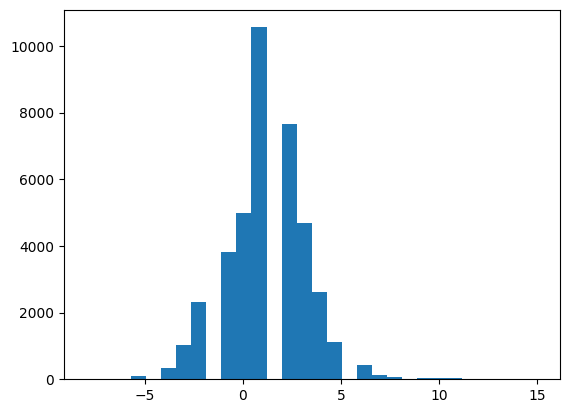

In [154]:
plt.hist(Dataset.load_from_disk("../../data/rmself/75self")['magnitude'], bins=30)

0.9433333333333334


(array([1.000e+00, 3.000e+00, 1.700e+01, 9.300e+01, 0.000e+00, 3.350e+02,
        1.043e+03, 2.329e+03, 0.000e+00, 3.822e+03, 5.001e+03, 5.726e+03,
        0.000e+00, 4.951e+03, 3.362e+03, 1.863e+03, 8.540e+02, 0.000e+00,
        3.190e+02, 1.050e+02, 5.200e+01, 0.000e+00, 2.400e+01, 2.900e+01,
        3.800e+01, 0.000e+00, 1.500e+01, 1.300e+01, 4.000e+00, 1.000e+00]),
 array([-8.        , -7.23333333, -6.46666667, -5.7       , -4.93333333,
        -4.16666667, -3.4       , -2.63333333, -1.86666667, -1.1       ,
        -0.33333333,  0.43333333,  1.2       ,  1.96666667,  2.73333333,
         3.5       ,  4.26666667,  5.03333333,  5.8       ,  6.56666667,
         7.33333333,  8.1       ,  8.86666667,  9.63333333, 10.4       ,
        11.16666667, 11.93333333, 12.7       , 13.46666667, 14.23333333,
        15.        ]),
 <BarContainer object of 30 artists>)

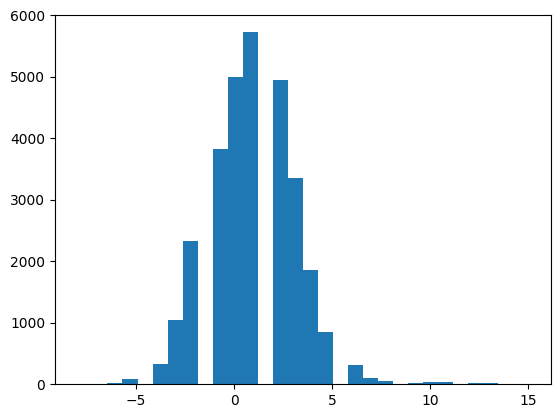

In [139]:
ival = 30000
print(mean(pdset['magnitude'][:ival]))
plt.hist(pdset['magnitude'][:ival], bins=30)

In [82]:
#### given a dataset based on generations, with corresponding rewards, and a gold-dataset, get a new mixed dataset that we can use for training to check extrapolation

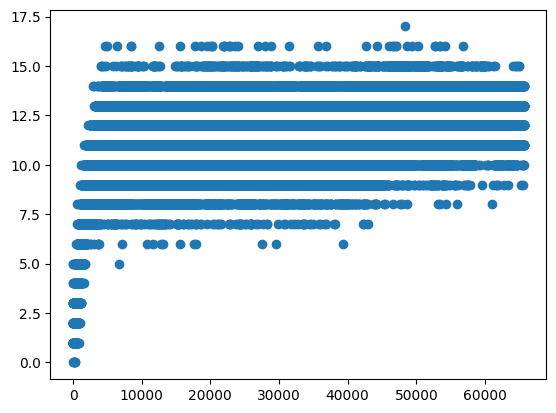

In [120]:
plt.scatter(range(len(pdset)), pdset['score_j'])

In [9]:
bowtrain

,inputs,outputs,rewards,keepinds,step
0,[Write a persuasive business letter in formal ...,[\nWrite an inquiry about the time you would l...,"[-14.5078125, 1.71484375, -14.390625, -11.4296...","[1, 3, 5, 6, 8, 11, 12, 14, 16, 19, 21, 23, 24...",0
1,[How can I use geospatial data to analyze patt...,[\nFed-up with the compensation for long-term ...,"[-14.5390625, -1.08203125, -14.4765625, 9.0156...","[1, 3, 5, 7, 8, 10, 12, 14, 17, 18, 20, 22, 25...",0
2,[Study the causes and effects of income inequa...,[\n\nYou may access this path by submitting th...,"[-14.640625, -6.26953125, -14.578125, -0.34472...","[1, 3, 4, 7, 8, 10, 13, 15, 17, 19, 21, 22, 24...",1
3,"[In your opinion, how might globalization and ...",[\nThis Olympic report showed that globalizati...,"[-6.375, -14.421875, -6.3046875, -6.3984375, -...","[0, 2, 4, 6, 9, 11, 12, 15, 17, 19, 21, 23, 25...",1
4,[Write a detailed and descriptive narrative ab...,[ETS(Representative Sotaturnate)\n\n*\n\n*\n\n...,"[-14.5703125, -4.97265625, 7.00390625, 5.10546...","[1, 2, 4, 7, 8, 10, 13, 15, 16, 19, 20, 22, 25...",2
...,...,...,...,...,...
995,[Please provide examples of successful communi...,[\nPlease provide a best possible experience t...,"[14.6171875, 14.59375, 14.421875, 14.3984375, ...","[0, 2, 4, 7, 9, 10, 12, 15, 17, 19, 20, 23, 24...",497
996,[How frequently are satellites updated or repl...,"[\nKey and importantly, create a safe experien...","[14.484375, 14.4921875, 14.6015625, 14.53125, ...","[1, 2, 4, 6, 8, 10, 12, 15, 17, 19, 20, 23, 25...",498
997,[Write a detailed report on how a trauma-infor...,[\n\nRespect your Leslie experience as an impo...,"[14.5078125, 14.625, 14.6640625, 14.4140625, 1...","[1, 2, 5, 7, 9, 11, 12, 14, 17, 19, 21, 22, 25...",498
998,[How can individuals without Microsoft Excel a...,[\nysb: Images may help further understand you...,"[14.4765625, 14.5546875, 14.5859375, 14.382812...","[1, 2, 4, 6, 8, 10, 13, 15, 17, 19, 20, 23, 25...",499
